In [1]:
import numpy as np
import pandas as pd
import re
import os
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
import glob

In [2]:
def preprocessing(filename):
    """Read a file and preprocessing ,return a token list"""
    content = read_file(filename)
    token_list = tokenization(content)
    token_list = remove_stop_word(token_list)
    token_list = sorted(token_list)
    return token_list

def read_file(filename):
    """Read the file of dictionary and return a string"""
    now_path = os.path.dirname(os.path.abspath("__file__"))+'/'
    f_value = open(now_path + filename, 'r', encoding='UTF-8')
    content = f_value.read()
    f_value.close()
    return content


def addJiebaWordDic(filename):
    """Read jieba word dict from file"""
    # read jieba word dict from file
    jiebaWordDict = read_file(filename)
    # split by \n
    jiebaWordDict = jiebaWordDict.split("\n")
    # remove empty item
    jiebaWordDict = list(filter(None, jiebaWordDict))
    # add word dict
    for word in jiebaWordDict:
        jieba.add_word(word, freq=None, tag=None)

def tokenization(content):
    """Tokenization"""
    #remove \t\n\r\f\v
    content = re.sub('[\t\n\r\f\v]', '', content)
    #remove " "
    content = re.sub(' ', '', content)
    #remove "　"
    content = re.sub('　', '', content)
    #remove [a-zA-Z]
    content = re.sub('[a-zA-z]', '', content)
    #remove [0-9]
    content = re.sub('[0-9]', '', content)
    #remove punctuation marks -> !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
    puncs = '，、：。～「」；？！「」『』—（）…－“–”〃〜─ㄧ＂︰％｢｣╱《》【】〔〕／•＋○■〈〉﹚＼'
    content = re.sub('['+puncs+']', '', content)
    content = re.sub('['+string.punctuation+']', '', content)

    # to jieba word dict
    token_list = jieba.cut(content, cut_all=False)
    token_list = list(token_list)

    #remove empty item
    token_list = list(filter(None, token_list))

    return token_list


def remove_stop_word(token_list):
    """remove stop word"""
    #Read Stop Word List
    stop_word_list = read_file('stop-word-list.txt')
    stop_word_list = stop_word_list.split('\n')
    #remove stop word from token_list
    token_list = [token for token in token_list if token not in stop_word_list]
    return token_list


def wordDict(token_list):
    """construct a word dictionary from token list"""
    wordDict = {}
    for w in token_list:
        if w in wordDict:
            wordDict[w] = wordDict[w] + 1
        else:
            wordDict[w] = 1
    return wordDict

def wordCloudImg(filename, word_Dict):
    """show a wordCloud img from word_Dict"""
    font = "/Library/Fonts/Microsoft/Microsoft Jhenghei.ttf"
    wordcloud = WordCloud(background_color="white", width=2000, height=1000, margin=2, font_path=font)
    wordcloud.fit_words(word_Dict)
    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud)
    wordcloud.to_file(filename)

def topTenWordImg(filename, word_Dict):
    """show img with top ten word from word_Dict"""
    words = sorted(word_Dict.items(), key=lambda x: x[1], reverse=True)
    top_ten_word = words[:10]
    label = []
    data = []
    for word in top_ten_word:
        label.append(word[0])
        data.append(word[1])
    fig = plt.figure(figsize=(10, 6))
    plt.bar(range(0, 10), data)
    plt.xticks(range(0, 10), label, fontsize=20)
    plt.show()
    fig.savefig(filename)

def write_file(filename, token_list):
    """write files"""
    now_path = os.path.dirname(os.path.abspath("__file__"))+'/'
    f_value = open(now_path + filename, 'w', encoding='UTF-8')
    for token in token_list:
        f_value.write("%s\n" % token)
    f_value.close()


def normal_stock():
    """output img of normal stock """
    normal = []
    for file in glob.glob(r'常規股/*/*.txt'):
        file_token = preprocessing(file)
        normal.extend(file_token)
    word_Dict = wordDict(normal)
    wordCloudImg("常規股img.png", word_Dict)
    topTenWordImg("常規股top_ten.png", word_Dict)
    write_file('常規股token_list''.txt', normal)

def not_normal_stock():
    """output img of not normal stock """
    not_normal = []
    for file in glob.glob(r'妖股/*/*.txt'):
        file_token = preprocessing(file)
        not_normal.extend(file_token)
    word_Dict = wordDict(not_normal)
    wordCloudImg("妖股img.png", word_Dict)
    topTenWordImg("妖股top_ten.png", word_Dict)
    write_file('妖股token_list''.txt', not_normal)

def new_not_normal_stock():
    """output img of 映泰 not normal stock """
    not_normal = []
    for file in glob.glob(r'映泰/*.txt'):
        file_token = preprocessing(file)
        not_normal.extend(file_token)
    word_Dict = wordDict(not_normal)
    wordCloudImg("映泰img.png", word_Dict)
    topTenWordImg("映泰top_ten.png", word_Dict)
    write_file('映泰token_list''.txt', not_normal)

### 從 jiebaWordDict.txt 加上 jieba 字典 

In [3]:
addJiebaWordDic("jiebaWordDict.txt")

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/9l/y12qsfms1wg6wlz7_c_b3hf00000gn/T/jieba.cache
Loading model cost 0.965 seconds.
Prefix dict has been built succesfully.


### init 四個 array 為之後的 dataframe做準備
- fileName -> 檔案名稱
- corpus -> 文章內容被結巴斷詞後的結果
- company -> 文章所屬的公司
- stockType -> 是常規股還是妖股

In [4]:
fileName = []
corpus = []
company = []
stockType = []

### 加上常規股的所有文件

In [5]:
for file in glob.glob(r'常規股/*/*.txt'):
    name = os.path.basename(file)
    fileName.append(name)
    if "聯發科" in name:
        company.append("聯發科")
    elif "台積電" in name:
        company.append("台積電")
    elif "台達電" in name:
        company.append("台達電")
    elif "鴻海" in name:
        company.append("鴻海")
    elif "中鋼" in name:
        company.append("中鋼")
    file_token = preprocessing(file)
    file_token_all = " ".join(file_token)
    corpus.append(file_token_all)
    stockType.append("常規股")
    
    print(name)
    print(file_token)

20180822聯發科.txt
['一步', '三', '三足鼎立', '事業調', '以及', '優化', '入', '內部', '兩項', '再度', '前台', '劃分', '力行', '加入', '半導', '半導體', '半導體', '半導體', '即', '原經', '另將', '召開', '召開', '國際', '團隊', '團隊並', '執行長', '大事', '奕力', '娛樂事業', '子公司', '子公司', '子公司', '家庭', '將成', '成立', '控相關', '推動', '擔任', '改組', '整案', '整除', '晨星', '晨星', '晨星', '晨星', '晨星', '晨星', '晨星', '晨星', '晶片', '晶片', '智能', '智能', '會將', '會達成', '月份', '業群', '機上', '正式', '決議', '為進', '營團', '產品轉', '盒', '研發', '科代', '科分', '科技', '科技', '移至', '移轉', '積電大將', '第一', '第一次', '第三', '第二', '簡易合', '納為', '組織', '組織調', '群', '群即', '群及', '群未來', '群無線', '群經過', '群聯', '落實', '蔡', '訊息', '記者', '調整', '請', '這次', '通訊', '邀', '重新', '重新', '重組', '隊將', '集團', '集團', '集團資', '電視', '電視', '電視', '預計明', '體觸']
20180629聯發科.txt
['下', '下', '下', '下首', '並且', '並鎖定', '中階產品', '主力', '之一', '之外', '之際', '乘勝', '交貨', '人員', '人員', '人員', '人士', '以來', '企圖', '企圖心', '傳出', '傳奪', '價業界', '充電', '全球', '全球', '兩大', '具體', '再', '再力', '前', '前往', '前往', '化', '北美', '北美', '北美', '北美', '北美', '北美', '博通', '卡位', '又', '可以', '合作', '品牌', '商透過', '單且', '單氣勢', 

20171011台達電.txt
['一同', '一年', '上揚', '下', '下台', '下滑', '不少', '不會', '不過', '中國', '主', '之中', '事業部', '交通', '亦', '以來', '以及', '低', '儲能', '元件', '元件', '充電樁', '全球', '再', '出貨', '出貨', '創下', '創新', '力道', '動台', '占', '去年同期', '受惠', '因為', '因為', '多', '大增', '太', '季明', '安裝', '家用', '已有', '市場', '市場', '帶動', '建置', '強', '性略顯', '成長', '把', '投入', '拉貨', '擺脫', '收以', '收成', '收衝', '改寫', '數萬', '日本', '旺季', '旺季', '是否', '智慧', '最高峰', '條件', '正值', '歷史', '比起', '沒', '流圈', '溫帶', '滿僅', '熱壓式', '營收', '營收', '營收', '營收', '營收', '狀況', '狀況', '獲利', '現年', '產品則', '疲弱', '相仿', '碳', '第', '第個', '第季營', '第季營', '第季營', '紀錄', '綠能', '維持', '網通產品', '總量', '美國', '而導', '致營', '萬盞', '萬盞', '被動', '被動', '裝置', '話', '貢獻', '走弱', '起', '路燈', '軛', '近', '近', '這也', '通常', '通訊', '連續', '運表現', '運表現', '達電', '達電', '量則', '隨著', '隻', '電月營', '電營收', '電積極', '需求', '需求', '需求增', '顯', '高台', '高檔', '高達成']
20180420台達電.txt
['一廠', '一廠', '一旦', '下半年', '中壢', '中心', '中心', '二林園', '二林園區', '人工智慧', '人產業', '人產業', '以上', '企業', '估計', '作業業界', '使用', '價款', '億元業界', '充廠', '全力', '全案', '全案', '全案', '初估', '則在', 

20180906中鋼.txt
['上半年', '上半年', '上半年', '上半年', '上半年', '上揚', '上游', '上漲', '下半年', '下半年', '下半年', '下游', '不利', '不會', '不淡', '不過', '不錯', '中國', '中鋼及', '中鴻將', '中鴻都', '亦可', '以來', '以及', '以及', '供應商', '偏', '價不會', '價續揚', '內銷', '內銷盤', '全年', '六季', '再度', '冬季', '出口', '創近', '加分', '勢續', '區域', '升', '反應', '受惠', '同時', '向上', '向上', '國家幣值', '報價', '報價', '大漲', '大跌', '大陸將', '密切', '實施', '審慎樂', '將持續', '將是', '將逾元', '展望', '市場', '平穩', '幾年', '廠商', '延續', '延長將', '強調', '影響', '影響', '影響', '恐將', '拚', '持穩', '措施', '提前', '支撐', '整盤', '整體', '整體', '旺到', '旺季', '時間', '更好', '最佳', '會平緩', '有助', '有所', '望', '本季', '條款', '樂觀', '機會連', '歐盟', '水準', '法人', '淡季', '漲', '漲', '為元', '為元', '獲利', '獲利力', '產生', '盤價續', '相對溫', '看到', '看法', '祭出', '穩中', '空間', '第一季', '第一季', '第一季', '第一季', '第一季', '第一季', '第三季', '第二季', '第四季', '第四季', '第四季', '第四季', '紀錄', '經濟', '美國', '翁朝棟', '翁朝棟', '翁朝棟', '翁朝棟', '考量', '臨時', '若', '要持續', '觀察', '觀業界', '解讀', '解讀', '認為', '調漲', '調漲', '貶值', '貶新興', '貿易戰', '走', '走勢', '走向', '趨漲', '連漲', '進口', '達元', '鋼價', '鋼價', '鋼價', '鋼價', '鋼市', '鋼市', '鋼廠', '鋼調', '鋼鋁

20180921鴻海.txt
['人才', '企業', '依', '價值鴻海', '價格進', '助益', '及其', '及產業', '合理', '市場', '技術', '提升', '擴大營', '故', '整合', '整合', '正面', '決定', '淨值', '發揮', '盈餘應', '策略', '綜效', '股權', '資源', '購', '購合約', '購後藉', '購案', '購透過', '轉型', '進行', '運規模', '遠', '關連', '預計將', '高']
20170811鴻海.txt
['下半年', '下滑', '中旬', '中旬', '主力', '億餘元', '公告', '加入', '動能', '吋', '同期', '因', '因應版', '因通訊產品', '基期', '基期', '墊', '大關', '子公司', '小跌', '市場', '強勁鴻海將', '成長', '投入', '持平', '支撐', '放量', '放量', '昨天', '有利於', '有望', '款版', '歷年', '消息', '消費產品', '營收', '營收', '營運動', '版本', '產品則', '產版', '產能將', '盈科', '盈科', '相當', '看鴻海', '穩千億元', '站', '第季動', '股權', '能鴻海', '萬', '讓', '起將', '轉成', '通訊產品', '連續', '進入量', '鄭州', '電腦', '電訊', '電訊', '需求', '預估鴻海', '香港', '高月業績', '高鴻海']
20180320鴻海.txt
['一塊', '上市', '上市', '上市', '上市', '下瑞祺', '下瑞祺電', '中資', '主委', '互聯', '以上', '佳績', '催動', '億元金', '全球', '券商', '可轉', '天鈺', '奧援', '如', '子公司', '安全', '安通', '家', '將拼創', '對樂觀', '工控', '市場', '布局', '引擎', '很多', '復', '成為鴻海', '成長', '承銷價', '拉貨', '拓展', '拼圖', '挑戰', '掛牌', '收將', '數成長', '新品', '暫定', '暫訂', '朱', '正', '沅', '法人', 

### 加上妖股的所有文件

In [6]:
for file in glob.glob(r'妖股/*/*.txt'):
    name = os.path.basename(file)
    fileName.append(name)
    if "世紀鋼" in name:
        company.append("世紀鋼")
    elif "國巨" in name:
        company.append("國巨")
    elif "大同" in name:
        company.append("大同")
    elif "威盛" in name:
        company.append("威盛")
    elif "旺宏" in name:
        company.append("旺宏")
    file_token = preprocessing(file)
    file_token_all = " ".join(file_token)
    corpus.append(file_token_all)
    stockType.append("妖股")
    
    print(name)
    print(file_token)

2018-02-02 國巨.txt
['一波國', '一致', '上游', '上游', '下午', '不利因素', '不堪', '不易', '中大', '中大', '中華區', '之下', '之外', '二度', '交期', '代表', '以上', '以上', '以及', '以車', '估值', '估波', '估計', '但是', '供給', '做', '偶業界', '傳出', '價行動', '價行動', '億億元', '內文', '全年', '全年', '兩波', '再漲', '分析', '初', '別是', '券商', '力道', '動作', '勢', '匯率', '占', '占', '厚膜', '厚膜', '受到', '台商', '台廠', '品特', '商不多', '啟動', '啟動', '因', '國巨將', '在外', '地區', '均', '坦言', '基板', '基板', '壓力', '多項', '大型', '大型', '大陸', '大雪', '大電', '如何', '將上', '將落', '將針', '對象', '小時', '尺寸', '尺寸', '尺寸', '工商', '工薪', '巨大', '巨年', '已有', '幅度', '廠商', '廠商', '廠廠', '影響', '影響', '從', '從產能', '心理', '挑戰元', '掃貨', '排阻', '接收', '提前', '擅長', '擴大', '擴產', '攀升', '收到', '放量', '政府', '新產能', '日系', '日起', '旺', '旺季', '昆山', '昆山', '時報', '時間', '晶片', '晶片', '晶片', '晶片', '晶片', '晶片', '晶片', '晶片', '晶片', '晶片', '替', '最高', '有待', '未來', '材料', '材料', '材料', '條件', '業務', '極大', '正式', '每日', '比約', '法人', '法人', '波漲', '準備', '漲', '漲價', '漲價', '漲價', '漲價', '漲勢國', '漲國', '漲幅', '漲幅國', '漲成國', '無', '無論', '營收', '營收', '獨有', '獲利', '獲利', '理陳佐銘', '產', '產能', '用工', '由國'

2018-04-27 國巨2.txt
['一年', '一度', '一成', '一路上', '一輪', '上市', '上旬', '不僅', '並沒有', '今天', '今年初', '以換', '保護', '保護', '停牌', '停牌', '停牌', '停牌', '停牌', '停牌', '傳', '傳出', '價為', '元件', '元件', '元件', '元件', '元國', '元大關', '先前', '先點', '全', '全數', '公告', '再', '再次', '凡台', '凱美售', '出現', '利潤', '利益', '前無法', '創造', '創造', '動作', '即使', '原因', '可能', '可能', '可能', '可觀', '合意', '合意', '同一', '同屬國', '同業', '名', '名舉', '啟動', '單季', '回應', '回應國', '回檔', '因為', '固態', '國內', '國內', '國巨今', '團成員', '團的', '在手', '大毅', '大毅', '大舉', '天線', '太陽', '奇力', '宣告', '將', '將於', '將於', '對象', '尤其', '尤其', '巨股價', '巨集', '巨集', '市值', '市場', '市場', '市場', '市場展', '廠佳邦', '延伸', '引發', '形式', '從', '急漲', '應', '成為國', '截稿', '揣', '揣測', '擴張', '收創', '收盤', '收購', '攻', '攻克', '方式', '日商', '日美系', '明會', '時間', '晶片', '本月', '條件', '櫃', '此次', '法人', '海外', '測將', '漲價', '漲元', '漲多', '無法', '無論', '獲利', '現金', '現金', '發動', '發言', '確實', '稅後純益', '積層', '窗口', '第季營', '缺貨', '美', '美商', '美磊凱', '股權', '至今', '舉行', '若', '著', '衝破並', '被動', '被動', '訊息', '該屬', '認為', '誘電', '諸多', '象大毅', '象是', '象針', '質電容', '購', '購', '購', '購同業', '

2018-05-28 威盛.txt
['一舉', '上導入', '不僅', '串', '主戰場', '主攻', '主流', '主體', '之外', '了解', '交換', '人工智慧', '人工智慧', '人工智慧', '人工智慧', '人工智慧', '以邊', '以邊', '任務數', '企業', '企業', '企業化', '使', '使用者', '促進', '優化', '優化', '全球', '全系', '出自', '分析', '切入', '則以', '副', '創立', '功能', '加入', '加速', '動化', '即使', '即時', '可靠性', '同時', '同時', '和靈', '商機', '大產品', '夯聯', '安全', '安全', '家庭', '實現', '將搶進', '工商', '工廠', '工廠', '工藝', '市場', '市場', '市場', '市場', '市場將', '市面上', '平', '建築', '建築', '強大', '微軟', '成各大', '我們', '所有', '手機', '手機', '手機', '技術', '把', '採集', '提高', '搭載', '搶攻', '據', '攜手', '支援', '整個', '整合', '時報', '智慧', '智慧', '智慧', '智慧型', '智慧型', '更是', '最嚴', '服務器', '架構', '核心', '格式', '機械', '機械', '機械', '活性', '流程', '消費性', '無風扇', '牆', '物聯', '物聯', '物聯', '物聯', '環境', '生態系', '生產力並', '用', '用', '由亞馬遜', '當中', '當前', '發表', '發表', '監控', '監控', '相結合', '確保', '神經', '科技', '窄頻', '競逐', '第一', '管理', '管理', '簡化', '終端', '終端', '統將', '統邊', '網為', '網產業', '網路', '網路', '網路', '網電視', '網領域', '緣', '緣運算', '緣運算', '總', '聯到', '聯網', '能夠', '臉書及', '自動化', '自動化', '自動化', '自駕車', '苛', '行銷', '衝', '規畫將', '角聯

2018-05-29 威盛.txt
['一個', '一次', '一款', '一款', '一款', '上行', '下行', '下行', '且', '中時', '中漲', '之產品', '交所將', '交換', '今股', '以及', '以及', '任意', '休眠', '使用者', '傳輸', '傳輸視', '價續', '優化', '優化', '充解決', '充電', '充電', '充電', '充電', '充電', '充電協定', '內建', '內部', '全球', '兩個', '兩個', '其列', '具備', '兼備', '兼容', '分鐘', '券', '功能', '功能', '功能', '匯流', '升降', '半導體', '半年度', '協會', '協議', '即', '各項', '同時', '同時', '同時', '同歡', '周邊', '周邊', '單埠能', '垂直', '埠', '埠', '埠', '報資訊', '壓轉', '多', '大幅', '大幅', '大漲', '威鋒', '威鋒', '威鋒', '威鋒', '威鋒', '完整', '容許', '實現', '實現', '將板', '導入', '小型', '尺寸', '尺寸', '已量', '市場', '市面上', '市面上', '幅', '度', '延續', '快速', '成分股', '所產生', '手機', '技術', '指令', '指數', '排電壓', '控制', '控制', '插用', '揚盤', '換器', '搭配', '撮合', '支援', '支援', '支援', '支援', '支援', '收款', '改善', '效能', '整合', '整合', '整合', '整合', '數十億個', '數據', '新品', '新品', '新產品', '方案', '方案', '既有', '日前', '時', '時威鋒', '時程', '普通', '晶片', '晶片', '晶片', '晶片', '晶片', '晶片', '智慧', '智慧型', '智能', '替代', '替代', '最新', '有效', '本身', '模式', '模式', '模式', '模式', '每', '溝通時', '溫度', '無', '牆', '特色', '獲', '率先', '產供貨', '當', '發熱問', '皆', '

2018-10-03 世紀鋼.txt
['一定', '下', '下游', '不會', '不要', '不論', '且', '世紀鋼', '丹麥', '交由', '以上', '佈', '佔', '侯奕愷', '侯奕愷', '侯奕愷', '侯奕愷', '促成', '信心', '信心', '倍', '億元且', '儘', '優惠', '優惠關', '儲存區', '免稅', '內', '全下給', '全球', '全球', '全能', '兩座', '兩風場', '公頃', '出席', '切割', '切割成', '初期', '剛', '剩支', '副', '創造個', '創造將', '只', '可以', '台灣區', '史上', '合約', '合約案', '呼籲', '哥本哈根', '唯一', '單樁', '單樁', '單筆', '國家', '地公頃', '均', '坦言', '執行長', '基礎', '基礎', '基礎', '基礎', '基礎', '基礎', '基礎', '基礎', '基礎', '基金', '外海', '多價格', '大單', '套管', '套管', '存放', '完整', '官員', '將全數', '將分', '將成', '將採', '就業', '局長', '局離岸', '展', '工業局', '已積極', '希望', '希望', '年前', '年限', '幾年', '座', '廠商', '廠房', '廠房', '建仁', '建仁', '建新', '建設', '建設', '式', '式', '式', '式', '強調', '彰芳', '彰芳', '彰芳', '很', '很大', '快', '性', '意味', '應維持', '應鏈', '成長', '成長', '我們', '才', '打造', '把', '投資', '投資金額', '指標', '採購', '推動', '搶', '據', '擴廠', '支持', '支持', '政府', '政府', '政府', '政府', '政府', '方案', '是否', '時', '時', '更是', '最具', '最高', '未來', '本土化', '本土化', '本土化', '本土化', '標準', '標準', '正式', '歷年', '法規', '港興', '特殊', '狀況', '現行', '生產到', '產值', '產

2018-01-23 世紀鋼2.txt
['一組', '下半年', '不然', '不然', '不過', '世界', '世紀鋼', '並行', '中央社', '丹麥', '丹麥', '丹麥', '二期工程', '交流', '人力', '人員', '什麼', '什麼', '今天', '今天', '今年底', '以上', '估計', '做', '備忘', '備忘錄', '備忘錄', '備忘錄', '備忘錄', '備忘錄', '債跟現', '優', '優先成', '優勢', '先', '內將', '全國', '全部', '兩個', '兩年後供', '公頃', '再', '再判', '再度', '則是', '動工', '北部', '半年', '協會', '南部', '召開', '可以', '可以', '可產出', '可達', '可達', '合作', '合作', '合作', '合作', '合作', '合作', '合作', '哥本哈根', '商', '商會', '商機', '商機後續', '商沃旭', '商達德', '問時', '單價', '因台', '國產化', '國產化', '土地', '培訓', '基', '基礎', '基礎', '基金', '增資新', '外世紀', '外國', '外賴', '多頭', '如果', '媒體訪', '完工', '完工', '完工', '將動工', '工程', '工程', '市場', '年產量', '廠商', '建設', '強攻', '從', '德國', '應', '應求', '應該', '成長', '我們', '我們', '承諾', '承諾賴', '技術', '技術', '技術', '投產', '投產風', '投資', '拓展', '拿到', '拿到', '接受', '接洽', '措到', '提出', '擴大產量', '擴大規模', '支年', '支年', '支風機', '政務次', '政府', '政府', '政府', '文祥', '文祥', '斷後續', '施工', '時間', '最多', '最大', '有世紀', '有效', '有望', '有關', '未來', '未來', '根據', '桃園', '機年', '權則', '歐洲', '歐洲', '正積極', '每年', '每年', '沃旭', '沒', '沒', '派出', '港', '港

2018-04-26 旺宏.txt
['一季', '一步', '上漲', '下午', '下半年', '下滑', '下滑', '不過', '不過', '不過', '中國', '中美貿易戰', '之一', '以利', '任天堂', '估持', '低品質', '低密度', '傳統', '億元大關', '儘', '儲存型', '元年', '元年', '公布', '其餘', '出貨量', '別', '動力', '匯率', '去年同期', '去年同期', '受', '受惠', '可以', '可能', '同樣', '向', '售價', '唯讀', '商將會', '單層式', '因應', '型', '增', '增', '增價格', '大陸廠', '太多', '存貨', '存貨', '存貨金額', '季增', '季減', '季減', '季減', '寬', '將供', '將僅', '將僅', '將持續', '將是', '將有', '將進', '對旺宏營', '展望', '市場', '市場', '市場', '市場', '市場', '市場', '平均', '弱', '強勁', '影響', '影響', '影響', '往年', '往年', '得以', '微幅', '微幅', '微幅', '快', '快', '情況', '情況', '應不會', '應求', '應求', '成長', '成長', '成長', '成長', '拉升', '持', '持穩下', '揚業績', '攀升', '攀高', '改變將', '效應', '整年', '整體', '旺季', '旺宏傳統', '旺宏將', '明會', '最淡', '有個', '有關', '未來', '李信', '某些', '業績', '業績', '歸屬', '母公司', '母公司', '水位', '沒有', '法人', '淡季', '淡季', '淡季', '淨利', '淨利新', '減少', '潤導', '營收', '獲利年', '產品線', '百分', '百分', '相當大', '看起', '穩定', '穩旺宏', '穩業績', '空間', '突破', '競爭', '第季業績', '第季略', '管', '純益', '純益', '結果', '線還', '編碼', '編輯', '緩', '至於', '致力', '舉行線', '記憶體', '記憶體', '記

2017-11-30 旺宏.txt
['三倍', '二到', '亮點', '低層數', '元件', '先進', '即可', '卻', '受到', '只要', '可達', '台灣產學', '各式', '唯一', '商彰', '國際', '國際', '垂直', '垂直', '型', '型', '型', '型', '堆', '堆', '堆疊層', '大幅', '大廠', '大廠', '大會', '大舉', '密度', '密度', '實力', '層', '層', '層數', '平坦', '平坦', '幾何', '很多', '快', '成果', '所堆', '扮演', '技術', '投入', '提升', '效應', '效果', '敏感度', '整體', '文獲', '旺宏強', '旺宏論', '晶胞', '晶胞', '最新', '有利', '架構', '業界', '此外', '減少', '渠道', '渠道', '獲得重', '獲選', '率', '現有', '現行', '環繞', '疊', '疊', '疊', '發旺宏', '相同', '相較', '研界', '研發', '研發', '研發', '研發', '肯定', '良', '角色', '記憶', '記憶', '記憶', '記憶體', '記憶體', '記憶體', '記憶體', '評選為', '調獨立', '論文', '論文入', '議題', '讀取', '資料', '達到', '適合', '選國際', '閃', '開發', '閘極', '關注', '電性', '電晶體', '電晶體', '需要', '頻繁', '顯旺宏', '顯示', '體開', '高度肯定']
2017-12-22 大同.txt
['一方面', '一方面', '七股', '七股', '上半年', '上半年', '下', '不佳', '並配', '中長', '主', '主', '主管', '今年底', '今後主', '以元', '以及', '以屋', '作收', '像是', '億股', '億股', '億股', '優化', '元年', '充實營', '充實營', '出售', '出資', '分散式', '分表', '切割', '前', '加速', '加速', '募集', '參與', '參與', '受綠能', '另訂', '台南', '台南', '台電及', '

2018-07-09 大同.txt
['三圓圓', '三讀', '上元關', '下持續', '之下', '今天', '以上', '估計', '佳佳', '保守', '修法', '公司法', '再', '創下', '加碼', '及欣', '召開', '同等', '咬', '土地', '基業', '外界', '多', '多來', '大動作', '奪戰恐', '如果', '市場', '市場', '市場', '市場', '市場', '建設', '引來', '恐成', '慘烈', '成', '成下', '手握', '持', '挑戰', '改寫', '改寫', '攻破', '新法', '更加', '條款', '權爭', '王光祥', '百年', '盤中漲', '突破', '累計', '結合', '緊', '股今', '股價衝', '自行', '覬覦', '誘人', '買進', '走高', '走高', '近期', '逾', '逾千億元', '過半', '過關', '適用', '鄭', '鄭文逸', '門檻', '開高', '關切', '面臨', '首家', '高度']
2018-03-22 大同.txt
['一位', '一步', '一看', '不實', '不實', '不實', '不應', '不是', '且', '且', '主持', '之爭', '之爭', '事實', '人現', '他進', '以上', '以大', '任何', '任何', '任現', '任由', '位', '作出', '佳佳', '依法', '依照', '保全', '保證', '倒', '借墊款', '做', '做', '偵辦', '債權', '價格元', '價證券', '充裕', '全面', '全面', '全體', '公告', '出現', '出現', '判刑', '前', '副', '加入', '動作', '募發', '募集', '募集', '包庇', '卻', '卻', '卻', '卻', '又', '及獨', '及股', '反對', '反對', '反彈', '受訪', '受訪', '受訪', '召開', '召開股', '合法', '呼應', '問題', '嗎', '執行', '增之', '增媒體', '增案', '增案', '增資並', '增資萬元', '多久', '多家', '大部分', '失職', '子公

2018-06-28 大同.txt
['一勝', '一勝', '一勝', '一敗', '一負', '一負', '七股', '七股', '下陣', '不變會', '不過', '不配', '主', '主持', '主管', '主管', '事業業務', '人議案', '人議案', '今年底', '以上', '以落實', '修改', '修改', '修改', '修改', '修改', '先', '先', '先例', '公司章程', '公司章程', '公司章程', '公司章程', '公司章程', '公司章程', '再', '出席率', '前哨', '功能性', '參一腳', '參與', '反', '可運作', '台南', '台南市', '名嘴', '向', '向', '向', '回升', '因', '因', '場派', '場股', '外資', '外部', '大同市', '大規模', '奏效', '委員會', '委員會', '委員會屬', '子公司', '宮', '尊重', '對戰', '小股', '小股', '局等', '已達', '市場', '市場', '市場', '市場', '市場', '市場', '建太陽', '成立', '戰股', '才能', '才能', '投標', '投資案', '指派', '提', '提到', '損林', '政府', '政府', '整合', '新增', '新增', '方向', '是否', '最快', '會中', '會後受', '朝設', '期虧', '未修改', '未能', '未過', '東', '東不滿', '東表達', '東關', '案未', '案首', '棄權', '業務才', '機構', '機關', '檢查', '檢查', '歉意', '正著手', '此', '每個', '水資源', '水資源', '水資源', '水資源', '水資源', '決', '決定', '決議', '治理', '治理', '治理', '治理', '法要', '注議', '派敗', '涉及', '清楚', '測試', '溝通', '漁光', '為彌補', '為首', '無', '無法', '營業', '營業', '特區', '獨立', '現增案', '由林', '由虧', '申請', '申請', '發', '票僅', '票僅', '程序', '空間', '策略', '策略'

In [7]:
new_fileName = []
new_corpus = []
new_company = []
new_stockType = []

In [8]:
for file in glob.glob(r'映泰/*.txt'):
    name = os.path.basename(file)
    new_fileName.append(name)
    new_company.append("映泰")
    file_token = preprocessing(file)
    file_token_all = " ".join(file_token)
    new_corpus.append(file_token_all)
    new_stockType.append("妖股")
    
    print(name)
    print(file_token)

20180228.txt
['一路', '下挫', '且', '中題', '乾淨台', '使用率', '光', '兩個', '再', '券資', '前', '副', '創下', '劇烈', '卡', '反彈', '召開', '台股', '台股', '台股', '台股', '回補', '回補', '回補', '回補', '多頭', '奕', '套牢', '市場', '幣挖', '得', '急', '急漲', '投顧', '挑選', '掀起', '搭配', '族群', '更是', '有映', '有望', '材', '杜富蓉', '概念股', '檔', '每年', '比特', '比高', '法人', '泰為', '清洗', '焦點', '熱絡', '相當', '短線', '礦', '穩定', '突破', '第一', '第三', '籌碼', '籌碼', '總', '缺口', '缺口', '股有', '股相當', '股處', '能否', '融券', '融券', '行情', '認為', '資深', '賣壓', '跌千點', '跳空', '軋空', '軌道', '近期', '近期', '進入', '過程', '選對個', '金投顧', '關注', '陳', '面臨', '顯示', '顯示', '高檔', '高點', '點的']
20180112-1.txt
['一美國', '不斷', '中國', '之上', '以來', '停', '停', '優缺資', '分析', '利多', '創下', '南', '卡', '只要', '可圈', '可點', '各國', '各異然', '回', '圖卡', '均線', '外資', '多國', '大量', '央行', '央行', '央行', '市場', '師也', '幣價格', '幣挖', '幣題', '成交量', '我國', '所有', '挾題', '攻漲', '數位', '族群', '日增', '映泰', '材', '材不退', '比特', '比特', '比特', '泰', '泰攻', '深產業', '漲', '焦點映', '熱潮', '營收', '營運持', '爆量', '研究', '礦熱多國', '站', '維持', '續樂', '萬張', '著手', '虛擬', '虛擬', '褒', '觀映', '認為', '貨幣', '貨幣', '貨幣

### 把四個array加到news的dict後再把它變成news_df的dataframe

In [9]:
news = {}
news["fileName"] = fileName
news["company"] = company
news["corpus"] = corpus
news["stockType"] = stockType

In [10]:
news_df = pd.DataFrame(news)

In [11]:
news_df

,fileName,company,corpus,stockType
0,20180822聯發科.txt,聯發科,一步 三 三足鼎立 事業調 以及 優化 入 內部 兩項 再度 前台 劃分 力行 加入 半導 ...,常規股
1,20180629聯發科.txt,聯發科,下 下 下 下首 並且 並鎖定 中階產品 主力 之一 之外 之際 乘勝 交貨 人員 人員 人...,常規股
2,20180109聯發科.txt,聯發科,上市 下半年 中階 中階 人工智慧 人臉 代表 全年 全面 功能 功能 功能 動能 反攻 問...,常規股
3,20180410聯發科.txt,聯發科,下 不斷 中階處 人工智慧 低點 價位 內建 公布 利多消息 功能 功能 助攻 反應 受 受...,常規股
4,20180426聯發科.txt,聯發科,一個 一步 一顆 上市 上聯 下 下半年 不同 不同 不同 不同 不同 不過 中國 中心 之...,常規股
5,20180412聯發科.txt,聯發科,一席之地 一樣 一流 上揚 下 不斷 不過 不錯 事情 人才 以外 伺服器 但現 佔 使用 ...,常規股
6,20171031聯發科.txt,聯發科,一劑 一大 以及 假設 做 傳出 其後續 其營運 具有 利基 前景 取代 取消 向 外電 如...,常規股
7,20180524聯發科.txt,聯發科,一個 一個 一步 下 下 下半年 下半年 不僅 中國 中國大陸 中端 中階 中階 中階 中階...,常規股
8,20180228聯發科.txt,聯發科,一直 一顆 不僅 並不 中期 中期 主戰場 也將 人工智慧 人工智慧 人工智慧 仍會 代表 ...,常規股
9,20180111聯發科.txt,聯發科,中心 之後聯 互動 人工智慧 人工智慧 人工智能 以天貓 傑 優勢 共同 具有 具有 副 加...,常規股


In [12]:
new_news = {}
new_news["fileName"] = new_fileName
new_news["company"] = new_company
new_news["corpus"] = new_corpus
new_news["stockType"] = new_stockType

In [13]:
new_news_df = pd.DataFrame(new_news)

In [14]:
new_news_df

,fileName,company,corpus,stockType
0,20180228.txt,映泰,一路 下挫 且 中題 乾淨台 使用率 光 兩個 再 券資 前 副 創下 劇烈 卡 反彈 召開...,妖股
1,20180112-1.txt,映泰,一美國 不斷 中國 之上 以來 停 停 優缺資 分析 利多 創下 南 卡 只要 可圈 可點 ...,妖股
2,20171211.txt,映泰,一度 一路 上月底 下滑 不少 不弱映 不過 中旬 主因 主戰場 之下 之前 五日 仍然 仍...,妖股
3,20180301.txt,映泰,一家 一度 一度 一日 三個 三市 三年 上半年 上季 下半年 下半年 下滑 不過 中國大陸...,妖股
4,20180305.txt,映泰,三年 上升 上漲 下半年 不同 不過 主 主力 主板 主機 主機板 今年初 仍為 以來 以系...,妖股
5,20180112.txt,映泰,且 主機板 也強 令主機 但現 俱 價量 兩大動 出現 動能將 卡 卡 卡運算 原料 原料 ...,妖股
6,20180306.txt,映泰,一同 三星 三星 下 下 不斷 不斷 交投 亮眼 使 停 傳 價彈 光 全球 再度 列 升 ...,妖股
7,20180104.txt,映泰,一定 一度 一波 不好 不過 不過 中國 中國 乃 之上 之勢 之外 之後回 二線 交易所 ...,妖股
8,20180111.txt,映泰,一度 下跌 主因 亦 亮燈 以及 休兵 停 價勢 優 全面 再起 創高 創高因 四日 增 多...,妖股
9,20171208-1.txt,映泰,一個 一個 下 不會 中華電信 主機 主機 兩個 再有 出貨 出貨 前季 努力 卡固態 又 ...,妖股


## 建立一個新的tfidf矩陣加入映泰的字

In [15]:
news_df

,fileName,company,corpus,stockType
0,20180822聯發科.txt,聯發科,一步 三 三足鼎立 事業調 以及 優化 入 內部 兩項 再度 前台 劃分 力行 加入 半導 ...,常規股
1,20180629聯發科.txt,聯發科,下 下 下 下首 並且 並鎖定 中階產品 主力 之一 之外 之際 乘勝 交貨 人員 人員 人...,常規股
2,20180109聯發科.txt,聯發科,上市 下半年 中階 中階 人工智慧 人臉 代表 全年 全面 功能 功能 功能 動能 反攻 問...,常規股
3,20180410聯發科.txt,聯發科,下 不斷 中階處 人工智慧 低點 價位 內建 公布 利多消息 功能 功能 助攻 反應 受 受...,常規股
4,20180426聯發科.txt,聯發科,一個 一步 一顆 上市 上聯 下 下半年 不同 不同 不同 不同 不同 不過 中國 中心 之...,常規股
5,20180412聯發科.txt,聯發科,一席之地 一樣 一流 上揚 下 不斷 不過 不錯 事情 人才 以外 伺服器 但現 佔 使用 ...,常規股
6,20171031聯發科.txt,聯發科,一劑 一大 以及 假設 做 傳出 其後續 其營運 具有 利基 前景 取代 取消 向 外電 如...,常規股
7,20180524聯發科.txt,聯發科,一個 一個 一步 下 下 下半年 下半年 不僅 中國 中國大陸 中端 中階 中階 中階 中階...,常規股
8,20180228聯發科.txt,聯發科,一直 一顆 不僅 並不 中期 中期 主戰場 也將 人工智慧 人工智慧 人工智慧 仍會 代表 ...,常規股
9,20180111聯發科.txt,聯發科,中心 之後聯 互動 人工智慧 人工智慧 人工智能 以天貓 傑 優勢 共同 具有 具有 副 加...,常規股


In [16]:
new_news_df

,fileName,company,corpus,stockType
0,20180228.txt,映泰,一路 下挫 且 中題 乾淨台 使用率 光 兩個 再 券資 前 副 創下 劇烈 卡 反彈 召開...,妖股
1,20180112-1.txt,映泰,一美國 不斷 中國 之上 以來 停 停 優缺資 分析 利多 創下 南 卡 只要 可圈 可點 ...,妖股
2,20171211.txt,映泰,一度 一路 上月底 下滑 不少 不弱映 不過 中旬 主因 主戰場 之下 之前 五日 仍然 仍...,妖股
3,20180301.txt,映泰,一家 一度 一度 一日 三個 三市 三年 上半年 上季 下半年 下半年 下滑 不過 中國大陸...,妖股
4,20180305.txt,映泰,三年 上升 上漲 下半年 不同 不過 主 主力 主板 主機 主機板 今年初 仍為 以來 以系...,妖股
5,20180112.txt,映泰,且 主機板 也強 令主機 但現 俱 價量 兩大動 出現 動能將 卡 卡 卡運算 原料 原料 ...,妖股
6,20180306.txt,映泰,一同 三星 三星 下 下 不斷 不斷 交投 亮眼 使 停 傳 價彈 光 全球 再度 列 升 ...,妖股
7,20180104.txt,映泰,一定 一度 一波 不好 不過 不過 中國 中國 乃 之上 之勢 之外 之後回 二線 交易所 ...,妖股
8,20180111.txt,映泰,一度 下跌 主因 亦 亮燈 以及 休兵 停 價勢 優 全面 再起 創高 創高因 四日 增 多...,妖股
9,20171208-1.txt,映泰,一個 一個 下 不會 中華電信 主機 主機 兩個 再有 出貨 出貨 前季 努力 卡固態 又 ...,妖股


In [17]:
all_news_df = news_df.append(new_news_df, ignore_index=True)
all_news_df

,fileName,company,corpus,stockType
0,20180822聯發科.txt,聯發科,一步 三 三足鼎立 事業調 以及 優化 入 內部 兩項 再度 前台 劃分 力行 加入 半導 ...,常規股
1,20180629聯發科.txt,聯發科,下 下 下 下首 並且 並鎖定 中階產品 主力 之一 之外 之際 乘勝 交貨 人員 人員 人...,常規股
2,20180109聯發科.txt,聯發科,上市 下半年 中階 中階 人工智慧 人臉 代表 全年 全面 功能 功能 功能 動能 反攻 問...,常規股
3,20180410聯發科.txt,聯發科,下 不斷 中階處 人工智慧 低點 價位 內建 公布 利多消息 功能 功能 助攻 反應 受 受...,常規股
4,20180426聯發科.txt,聯發科,一個 一步 一顆 上市 上聯 下 下半年 不同 不同 不同 不同 不同 不過 中國 中心 之...,常規股
5,20180412聯發科.txt,聯發科,一席之地 一樣 一流 上揚 下 不斷 不過 不錯 事情 人才 以外 伺服器 但現 佔 使用 ...,常規股
6,20171031聯發科.txt,聯發科,一劑 一大 以及 假設 做 傳出 其後續 其營運 具有 利基 前景 取代 取消 向 外電 如...,常規股
7,20180524聯發科.txt,聯發科,一個 一個 一步 下 下 下半年 下半年 不僅 中國 中國大陸 中端 中階 中階 中階 中階...,常規股
8,20180228聯發科.txt,聯發科,一直 一顆 不僅 並不 中期 中期 主戰場 也將 人工智慧 人工智慧 人工智慧 仍會 代表 ...,常規股
9,20180111聯發科.txt,聯發科,中心 之後聯 互動 人工智慧 人工智慧 人工智能 以天貓 傑 優勢 共同 具有 具有 副 加...,常規股


In [18]:
import re
import time
import io
import os
import json
import pandas as pd
from optparse import OptionParser
from pandas import DataFrame, read_csv

In [19]:
all_news_df

,fileName,company,corpus,stockType
0,20180822聯發科.txt,聯發科,一步 三 三足鼎立 事業調 以及 優化 入 內部 兩項 再度 前台 劃分 力行 加入 半導 ...,常規股
1,20180629聯發科.txt,聯發科,下 下 下 下首 並且 並鎖定 中階產品 主力 之一 之外 之際 乘勝 交貨 人員 人員 人...,常規股
2,20180109聯發科.txt,聯發科,上市 下半年 中階 中階 人工智慧 人臉 代表 全年 全面 功能 功能 功能 動能 反攻 問...,常規股
3,20180410聯發科.txt,聯發科,下 不斷 中階處 人工智慧 低點 價位 內建 公布 利多消息 功能 功能 助攻 反應 受 受...,常規股
4,20180426聯發科.txt,聯發科,一個 一步 一顆 上市 上聯 下 下半年 不同 不同 不同 不同 不同 不過 中國 中心 之...,常規股
5,20180412聯發科.txt,聯發科,一席之地 一樣 一流 上揚 下 不斷 不過 不錯 事情 人才 以外 伺服器 但現 佔 使用 ...,常規股
6,20171031聯發科.txt,聯發科,一劑 一大 以及 假設 做 傳出 其後續 其營運 具有 利基 前景 取代 取消 向 外電 如...,常規股
7,20180524聯發科.txt,聯發科,一個 一個 一步 下 下 下半年 下半年 不僅 中國 中國大陸 中端 中階 中階 中階 中階...,常規股
8,20180228聯發科.txt,聯發科,一直 一顆 不僅 並不 中期 中期 主戰場 也將 人工智慧 人工智慧 人工智慧 仍會 代表 ...,常規股
9,20180111聯發科.txt,聯發科,中心 之後聯 互動 人工智慧 人工智慧 人工智能 以天貓 傑 優勢 共同 具有 具有 副 加...,常規股


In [20]:
mergeData = all_news_df.groupby(['stockType', 'company'])['corpus'].apply(' '.join).reset_index()
mergeData

,stockType,company,corpus
0,妖股,世紀鋼,不一樣 世 丹麥 付款 但是 作 供過 修改 做 備忘錄 公司章程 公尺 其實 分析 務 只...
1,妖股,國巨,一波國 一致 上游 上游 下午 不利因素 不堪 不易 中大 中大 中華區 之下 之外 二度 ...
2,妖股,大同,一方面 一方面 七股 七股 上半年 上半年 下 不佳 並配 中長 主 主 主管 今年底 今後...
3,妖股,威盛,一斑 一體化 上午 上將 下周 世界 並未證 並舉行 並表達 中國 主場 主場 主席 主席 ...
4,妖股,旺宏,三大產品 上半年 下半年 下半年 下半年 不在營 不怕 不會 不會 且售 且售 中國廠 亮麗...
5,妖股,映泰,一路 下挫 且 中題 乾淨台 使用率 光 兩個 再 券資 前 副 創下 劇烈 卡 反彈 召開...
6,常規股,中鋼,下 下游 下游 且 並應用 代表人 件 估計 但經 低能耗 使得 億元產值 優勢 內外 全球...
7,常規股,台積電,並專注 全 利用 削減 前至代 半導體 可用 大廠 奈米 奈米 安排 完全 將車 希望 微控...
8,常規股,台達電,上半年 下半年 下半年 中國 中國 中擁 串連 之一 以上 以外 以外 佔 使用 傳統 傳統...
9,常規股,聯發科,一步 三 三足鼎立 事業調 以及 優化 入 內部 兩項 再度 前台 劃分 力行 加入 半導 ...


In [21]:
mergeData['stockType'][mergeData['stockType'] == "妖股"] = 'abnormal'
mergeData['stockType'][mergeData['stockType'] == "常規股"] = 'normal'
mergeData

,stockType,company,corpus
0,abnormal,世紀鋼,不一樣 世 丹麥 付款 但是 作 供過 修改 做 備忘錄 公司章程 公尺 其實 分析 務 只...
1,abnormal,國巨,一波國 一致 上游 上游 下午 不利因素 不堪 不易 中大 中大 中華區 之下 之外 二度 ...
2,abnormal,大同,一方面 一方面 七股 七股 上半年 上半年 下 不佳 並配 中長 主 主 主管 今年底 今後...
3,abnormal,威盛,一斑 一體化 上午 上將 下周 世界 並未證 並舉行 並表達 中國 主場 主場 主席 主席 ...
4,abnormal,旺宏,三大產品 上半年 下半年 下半年 下半年 不在營 不怕 不會 不會 且售 且售 中國廠 亮麗...
5,abnormal,映泰,一路 下挫 且 中題 乾淨台 使用率 光 兩個 再 券資 前 副 創下 劇烈 卡 反彈 召開...
6,normal,中鋼,下 下游 下游 且 並應用 代表人 件 估計 但經 低能耗 使得 億元產值 優勢 內外 全球...
7,normal,台積電,並專注 全 利用 削減 前至代 半導體 可用 大廠 奈米 奈米 安排 完全 將車 希望 微控...
8,normal,台達電,上半年 下半年 下半年 中國 中國 中擁 串連 之一 以上 以外 以外 佔 使用 傳統 傳統...
9,normal,聯發科,一步 三 三足鼎立 事業調 以及 優化 入 內部 兩項 再度 前台 劃分 力行 加入 半導 ...


In [22]:
corpus = mergeData['corpus'].values.tolist()

In [23]:
# TF-IDF
# coding:utf-8  
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(corpus)  
word = vectorizer.get_feature_names()  

from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

In [24]:
len(corpus)
features = tfidf.toarray()
labels = mergeData['company'].values
labels

array(['世紀鋼', '國巨', '大同', '威盛', '旺宏', '映泰', '中鋼', '台積電', '台達電', '聯發科',
       '鴻海'], dtype=object)

In [25]:
# PCA
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
transData = pca.fit_transform(features, labels)
type(transData)
mergeData['pca1'] = DataFrame(transData[:,0])
mergeData['pca2'] = DataFrame(transData[:,1])
mergeData

,stockType,company,corpus,pca1,pca2
0,abnormal,世紀鋼,不一樣 世 丹麥 付款 但是 作 供過 修改 做 備忘錄 公司章程 公尺 其實 分析 務 只...,0.714713,-0.228444
1,abnormal,國巨,一波國 一致 上游 上游 下午 不利因素 不堪 不易 中大 中大 中華區 之下 之外 二度 ...,-0.139819,0.247736
2,abnormal,大同,一方面 一方面 七股 七股 上半年 上半年 下 不佳 並配 中長 主 主 主管 今年底 今後...,0.054348,-0.097466
3,abnormal,威盛,一斑 一體化 上午 上將 下周 世界 並未證 並舉行 並表達 中國 主場 主場 主席 主席 ...,-0.286322,-0.395290
4,abnormal,旺宏,三大產品 上半年 下半年 下半年 下半年 不在營 不怕 不會 不會 且售 且售 中國廠 亮麗...,-0.086602,0.357629
5,abnormal,映泰,一路 下挫 且 中題 乾淨台 使用率 光 兩個 再 券資 前 副 創下 劇烈 卡 反彈 召開...,0.044561,0.695537
6,normal,中鋼,下 下游 下游 且 並應用 代表人 件 估計 但經 低能耗 使得 億元產值 優勢 內外 全球...,0.587990,-0.043197
7,normal,台積電,並專注 全 利用 削減 前至代 半導體 可用 大廠 奈米 奈米 安排 完全 將車 希望 微控...,-0.311167,0.059719
8,normal,台達電,上半年 下半年 下半年 中國 中國 中擁 串連 之一 以上 以外 以外 佔 使用 傳統 傳統...,-0.047309,-0.146023
9,normal,聯發科,一步 三 三足鼎立 事業調 以及 優化 入 內部 兩項 再度 前台 劃分 力行 加入 半導 ...,-0.387211,-0.256601


/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


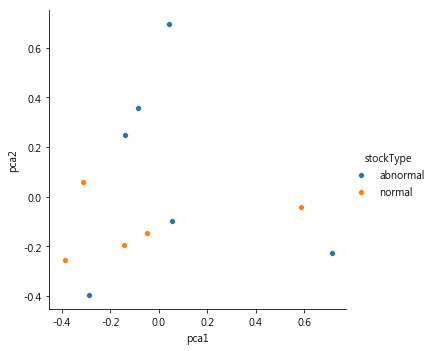

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(x_vars=['pca1'], y_vars=['pca2'], data=mergeData, hue="stockType", size=5)

In [27]:
textFrame = pd.DataFrame(features, columns = word)
textFrame.head()
len(features)

11

In [28]:
allF = features.flatten()
nonZero = allF[np.nonzero(allF)]
m = np.median(nonZero)

In [29]:
allF[np.nonzero(allF)]

array([0.00538744, 0.00361921, 0.00538744, ..., 0.02374532, 0.02374532,
       0.02374532])

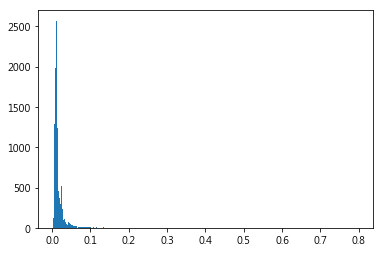

0.011480398653374146

In [30]:
plt.hist(nonZero, bins=500)
plt.show()
m

In [31]:
m = 0.1
dataset = list()
for i in range(len(features)):
    temp = textFrame.columns.values[[textFrame.iloc[i] >= m]]
    dataset.append(temp.tolist())

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.


In [32]:
for i in range(len(features)):
    print(dataset[i])

['基礎', '風場', '風電']
['元件', '君耀', '巨集', '市場', '成長', '收購', '新科', '晶片', '營收', '被動', '車用', '電阻']
['公司法', '增資', '太陽能', '市場', '林宏信', '條款', '欣同', '現金', '申報', '發行', '經營權', '郭文艷', '金管會', '陸資', '電廠']
['人工智慧', '台語', '吳億盼', '商店', '城市', '嵌入式', '市場', '智慧', '歐拉蜜', '汽車', '無人', '物聯', '語音', '辨識', '邊緣', '駕駛']
['和解', '專利', '支付', '旺宏萬', '東芝', '產能', '研發', '記憶', '記憶體', '需求', '高容量']
['主板', '市場', '幣價格', '挖礦', '映泰', '板卡', '比特', '礦商機', '虛擬', '貨幣', '顯示']
['基礎', '外銷', '大陸', '每公噸', '潛艦', '稅前', '翁朝棟', '萬公噸', '調漲', '鋼價', '鋼市', '鋼廠', '鋼筋', '鋼鐵', '電磁鋼片', '風電']
['三星', '劉德音', '奈米', '張忠謀', '手機', '晶圓', '晶片', '法人', '積電', '英特', '蘋果']
['基礎', '市場', '布局', '手臂', '收購', '晶睿', '智慧', '樓宇', '機器', '汽車', '營收', '自動化', '路燈', '達電', '零組件', '電動車']
['人工智慧', '力行', '市場', '手機', '晶片', '智慧', '版本', '蘋果', '音箱']
['中國', '其次', '印度', '埃及', '夏普', '富士康', '小米', '投資', '消費性', '珠海', '通訊產品', '集團']


In [33]:
# Apriori: https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
graph = df.T
graph.columns = mergeData['company']

In [34]:
graph

company,世紀鋼,國巨,大同,威盛,旺宏,映泰,中鋼,台積電,台達電,聯發科,鴻海
三星,False,False,False,False,False,False,False,True,False,False,False
中國,False,False,False,False,False,False,False,False,False,False,True
主板,False,False,False,False,False,True,False,False,False,False,False
人工智慧,False,False,False,True,False,False,False,False,False,True,False
元件,False,True,False,False,False,False,False,False,False,False,False
公司法,False,False,True,False,False,False,False,False,False,False,False
其次,False,False,False,False,False,False,False,False,False,False,True
劉德音,False,False,False,False,False,False,False,True,False,False,False
力行,False,False,False,False,False,False,False,False,False,True,False
印度,False,False,False,False,False,False,False,False,False,False,True


In [35]:
from mlxtend.frequent_patterns import apriori

minsup = 0.01
apriori(graph, min_support = minsup, use_colnames=True)

,support,itemsets
0,0.026316,(世紀鋼)
1,0.105263,(國巨)
2,0.131579,(大同)
3,0.140351,(威盛)
4,0.096491,(旺宏)
5,0.096491,(映泰)
6,0.140351,(中鋼)
7,0.096491,(台積電)
8,0.140351,(台達電)
9,0.078947,(聯發科)


In [36]:
result = apriori(graph, min_support = minsup)
result

,support,itemsets
0,0.026316,(0)
1,0.105263,(1)
2,0.131579,(2)
3,0.140351,(3)
4,0.096491,(4)
5,0.096491,(5)
6,0.140351,(6)
7,0.096491,(7)
8,0.140351,(8)
9,0.078947,(9)


In [37]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(result, metric="confidence", min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0),(6),0.026316,0.140351,0.017544,0.666667,4.750000,0.013850,2.578947
1,"(8, 9)",(3),0.017544,0.140351,0.017544,1.000000,7.125000,0.015082,inf
2,"(8, 3)",(9),0.026316,0.078947,0.017544,0.666667,8.444444,0.015466,2.763158
3,"(9, 3)",(8),0.026316,0.140351,0.017544,0.666667,4.750000,0.013850,2.578947


In [38]:
rules = association_rules(result, metric="lift", min_threshold=1.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0),(6),0.026316,0.140351,0.017544,0.666667,4.750000,0.013850,2.578947
1,(6),(0),0.140351,0.026316,0.017544,0.125000,4.750000,0.013850,1.112782
2,(8),(1),0.140351,0.105263,0.026316,0.187500,1.781250,0.011542,1.101215
3,(1),(8),0.105263,0.140351,0.026316,0.250000,1.781250,0.011542,1.146199
4,(1),(9),0.105263,0.078947,0.017544,0.166667,2.111111,0.009234,1.105263
5,(9),(1),0.078947,0.105263,0.017544,0.222222,2.111111,0.009234,1.150376
6,(8),(3),0.140351,0.140351,0.026316,0.187500,1.335938,0.006617,1.058030
7,(3),(8),0.140351,0.140351,0.026316,0.187500,1.335938,0.006617,1.058030
8,(9),(3),0.078947,0.140351,0.026316,0.333333,2.375000,0.015235,1.289474
9,(3),(9),0.140351,0.078947,0.026316,0.187500,2.375000,0.015235,1.133603


In [39]:
rules["antecedant_len"] = rules["antecedents"].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len
0,(0),(6),0.026316,0.140351,0.017544,0.666667,4.750000,0.013850,2.578947,1
1,(6),(0),0.140351,0.026316,0.017544,0.125000,4.750000,0.013850,1.112782,1
2,(8),(1),0.140351,0.105263,0.026316,0.187500,1.781250,0.011542,1.101215,1
3,(1),(8),0.105263,0.140351,0.026316,0.250000,1.781250,0.011542,1.146199,1
4,(1),(9),0.105263,0.078947,0.017544,0.166667,2.111111,0.009234,1.105263,1
5,(9),(1),0.078947,0.105263,0.017544,0.222222,2.111111,0.009234,1.150376,1
6,(8),(3),0.140351,0.140351,0.026316,0.187500,1.335938,0.006617,1.058030,1
7,(3),(8),0.140351,0.140351,0.026316,0.187500,1.335938,0.006617,1.058030,1
8,(9),(3),0.078947,0.140351,0.026316,0.333333,2.375000,0.015235,1.289474,1
9,(3),(9),0.140351,0.078947,0.026316,0.187500,2.375000,0.015235,1.133603,1


In [40]:
out = rules[ (rules['antecedant_len'] >= 2) &
       (rules['confidence'] > 0.5) &
       (rules['lift'] > 1.2) ]
out.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len
14,"(8, 9)",(3),0.017544,0.140351,0.017544,1.000000,7.125000,0.015082,inf,2
15,"(8, 3)",(9),0.026316,0.078947,0.017544,0.666667,8.444444,0.015466,2.763158,2
16,"(9, 3)",(8),0.026316,0.140351,0.017544,0.666667,4.750000,0.013850,2.578947,2


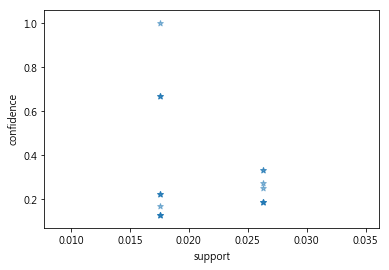

In [41]:
support = rules['support']
confidence = rules['confidence']
plt.scatter(support, confidence, alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [42]:
len(rules)
rules['antecedents']

0        (0)
1        (6)
2        (8)
3        (1)
4        (1)
5        (9)
6        (8)
7        (3)
8        (9)
9        (3)
10       (9)
11       (7)
12       (8)
13       (9)
14    (8, 9)
15    (8, 3)
16    (9, 3)
17       (8)
18       (9)
19       (3)
Name: antecedents, dtype: object

In [43]:
import networkx as nx
G = nx.DiGraph()
for i in range(len(mergeData)):
    G.add_node(i)
for i in range(len(rules['antecedents'])):
    currentFrom = list(rules['antecedents'][i])
    currentTo = list(rules['consequents'][i])
    for j in range(len(currentFrom)):
        G.add_edge(currentFrom[j], currentTo[0])

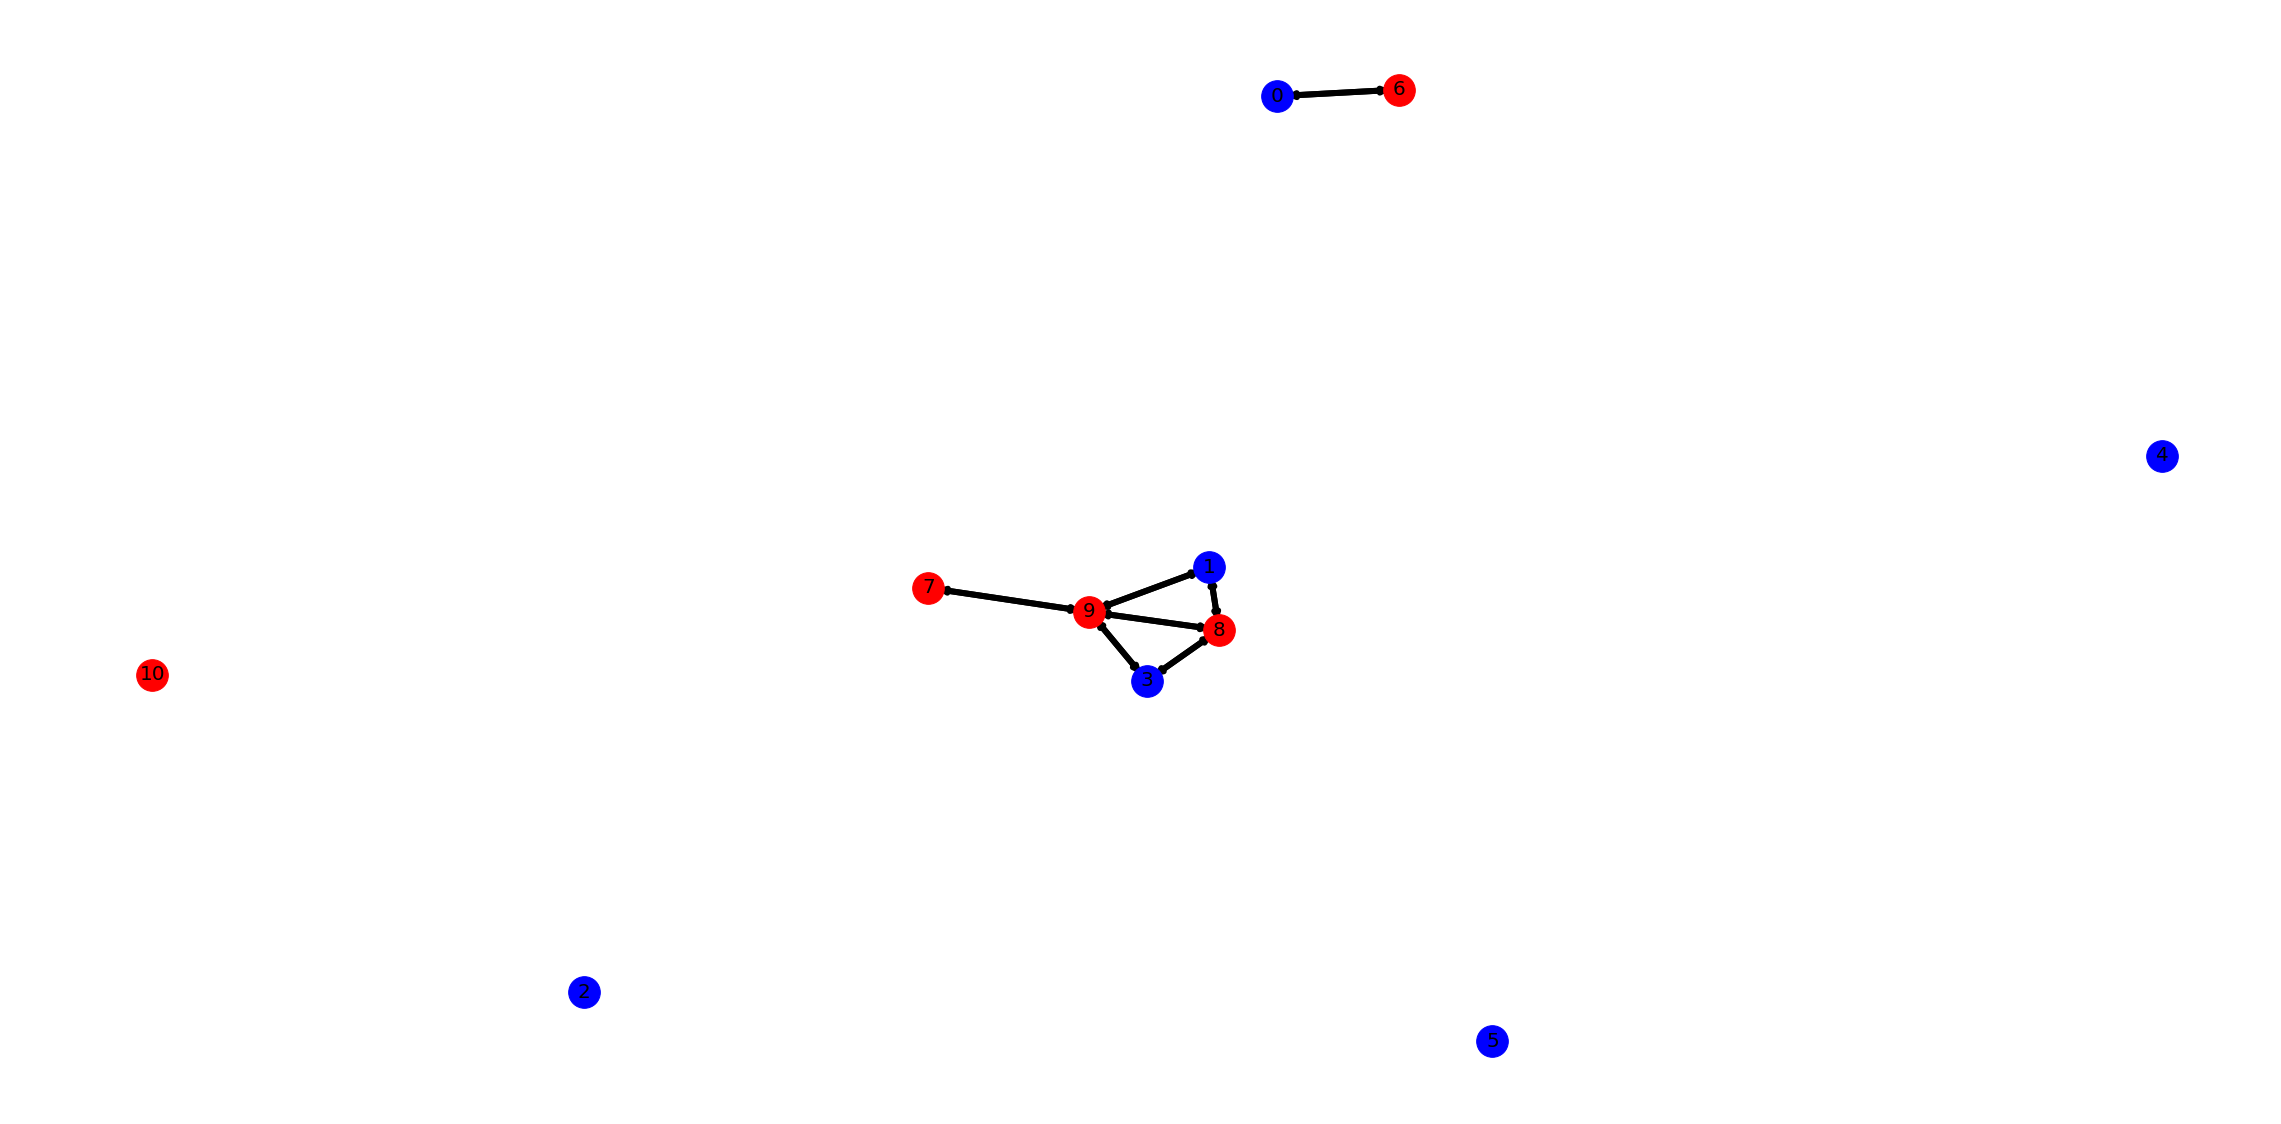

In [44]:
nodeListA = mergeData.index[mergeData['stockType'] == 'abnormal'].tolist()
nodeListB = mergeData.index[mergeData['stockType'] == 'normal'].tolist()

plt.figure(figsize=(40,20))

# positions for all nodes
pos = nx.fruchterman_reingold_layout(G)

# nodes
nx.draw_networkx_nodes(G, pos, nodelist=nodeListA, node_color="b", node_size=1000)
nx.draw_networkx_nodes(G, pos, nodelist=nodeListB, node_color="r", node_size=1000)
nx.draw_networkx_edges(G, pos, width=6)

# labels
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

plt.axis('off')
plt.savefig("weighted_graph.png") # save as png
plt.show() # display

In [45]:
# 獨立議題，和其他社團無關聯
list(nx.isolates(G))

[2, 4, 5, 10]

In [46]:
# 小群體
from networkx.algorithms.approximation import dominating_set
dominating_set.min_edge_dominating_set(G)

{(0, 6), (1, 8), (3, 9)}

In [47]:
pd.DataFrame(graph.columns)

,company
0,世紀鋼
1,國巨
2,大同
3,威盛
4,旺宏
5,映泰
6,中鋼
7,台積電
8,台達電
9,聯發科
